# Introduction

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("aerofit_treadmill.csv")
print(df.shape)
df.head()

(180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [132]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [137]:
df[['Product', 'Gender', 'MaritalStatus']].describe()

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [67]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Defining Problem Statement and Analysing basic metrics

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
3. No nulls values present in the data
4. The data is fully cleaned and best categorised
5. Top customers as of Product is KP281, Gender Male, MaritalStatus is Partnered

# Non-Graphical Analysis: Value counts and unique attributes

In [68]:
data = []
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [69]:
# Product value counts

df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [70]:
# Product unique attributes

df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [71]:
# Ages value counts

df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [72]:
# Age unique attributes

df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [73]:
# Gender value counts

df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [74]:
# Gender unique attributes

df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
# Education value counts

df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [76]:
# Education unique attributes

df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [77]:
# MaritalStatus value counts

df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [78]:
# MaritalStatus unique attributes

df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [79]:
# Usage value counts

df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [80]:
# usage unique attributes

df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [81]:
# Income value counts

df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [82]:
# Income unique attributes

df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [83]:
# Fitness value counts

df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [84]:
# Fitness unique attributes

df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [85]:
# Miles value counts

df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [86]:
# Miles unique attributes

df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

# Visual Analysis - Univariate & Bivariate

## For continuous variable(s): Distplot, countplot, histogram for univariate analysis

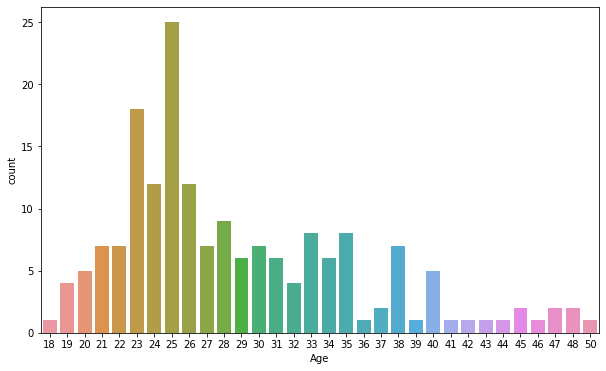

In [87]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Age', data = df)
plt.show()

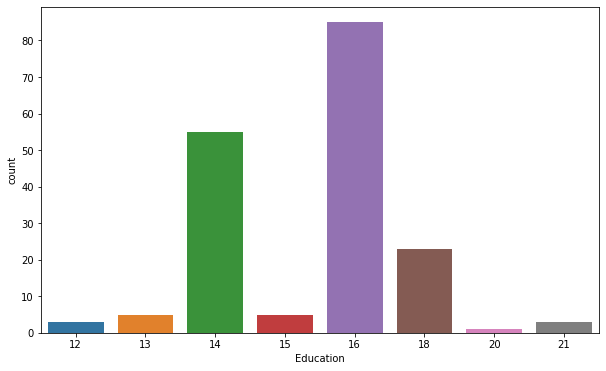

In [88]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Education', data = df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


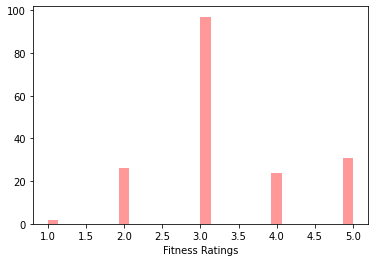

In [89]:
sns.distplot(df['Fitness'], kde = False, color ='red', bins = 30)
plt.xlabel('Fitness Ratings')
plt.show()

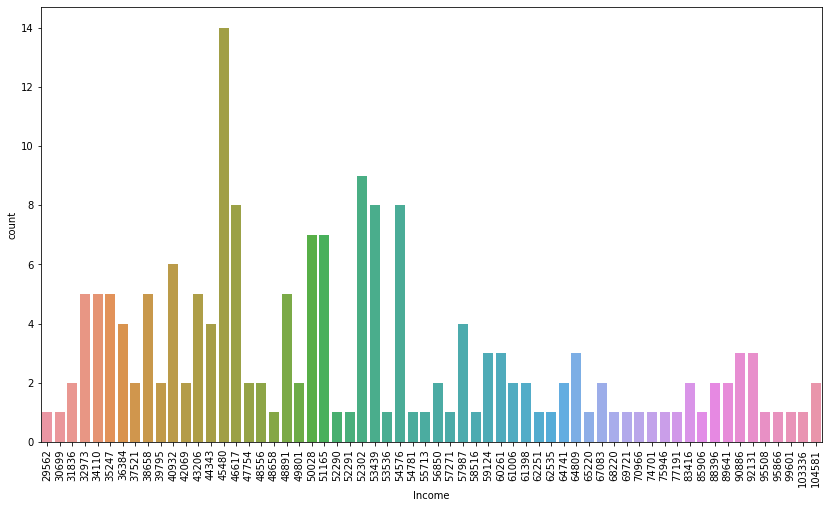

In [90]:
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Income', data = df)
plt.xticks(rotation = 90)
plt.show()

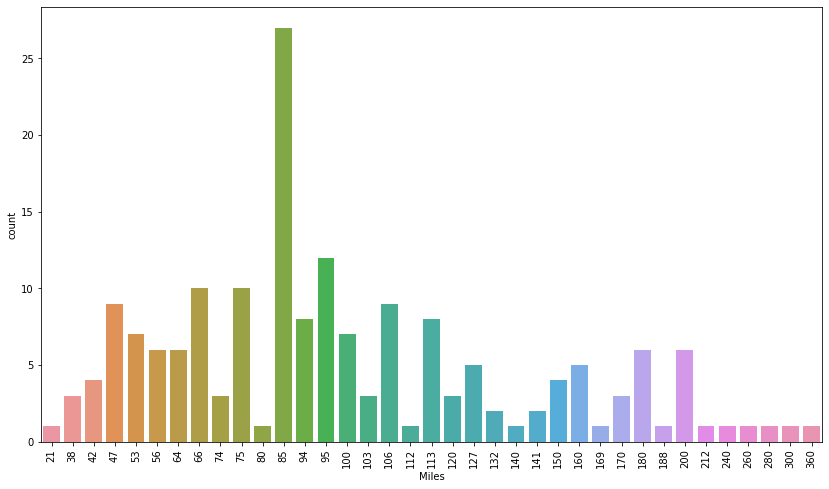

In [91]:
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Miles', data = df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

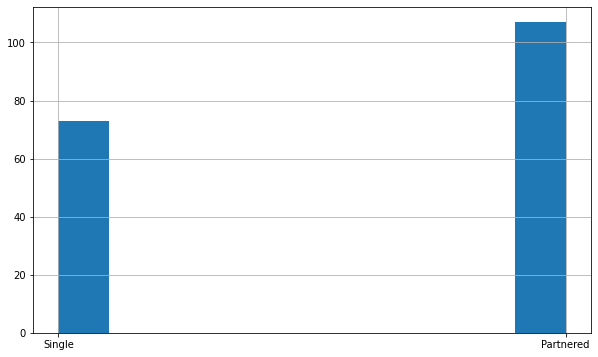

In [92]:
plt.figure(figsize = (10, 6))
df['MaritalStatus'].hist()

<AxesSubplot:>

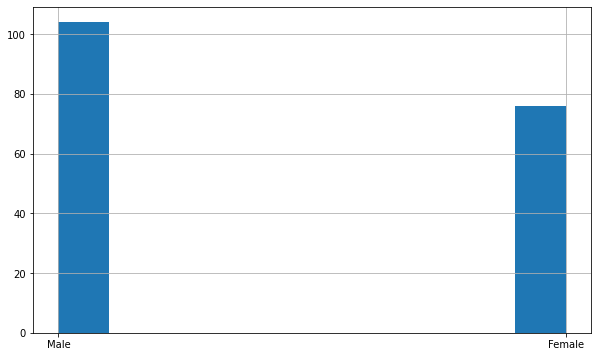

In [93]:
plt.figure(figsize = (10, 6))
df['Gender'].hist()

## For categorical variable(s): Boxplot 

<AxesSubplot:xlabel='Product', ylabel='Age'>

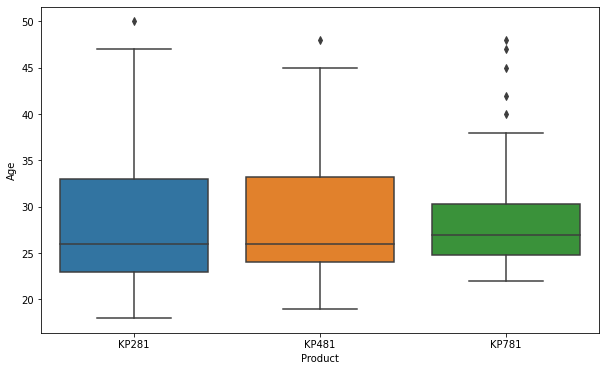

In [94]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Age'])

<AxesSubplot:xlabel='Product', ylabel='Education'>

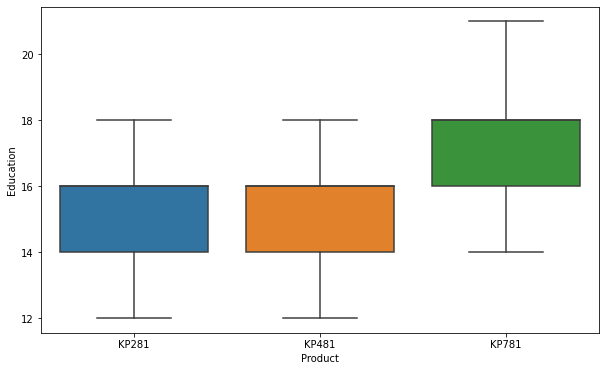

In [95]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Education'])

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

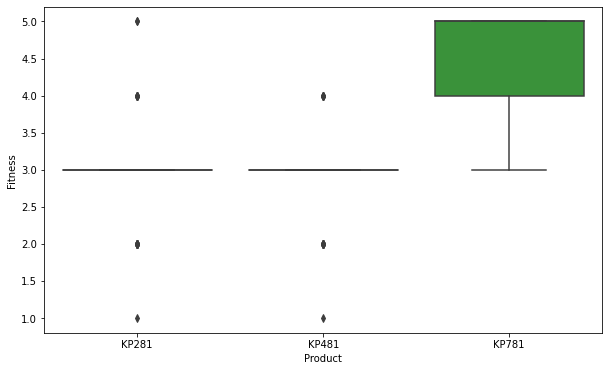

In [96]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Fitness'])

<AxesSubplot:xlabel='Product', ylabel='Usage'>

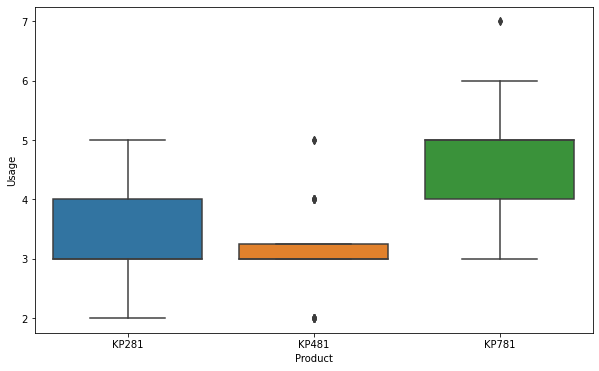

In [97]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Usage'])

<AxesSubplot:xlabel='Product', ylabel='Income'>

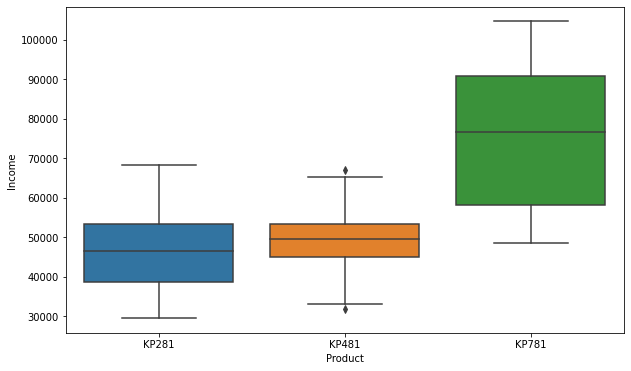

In [98]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Income'])

<AxesSubplot:xlabel='Product', ylabel='Miles'>

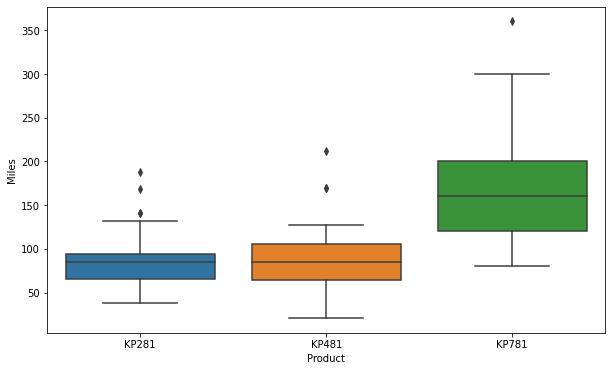

In [99]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['Product'], y = df['Miles'])

## For correlation: Heatmaps, Pairplots

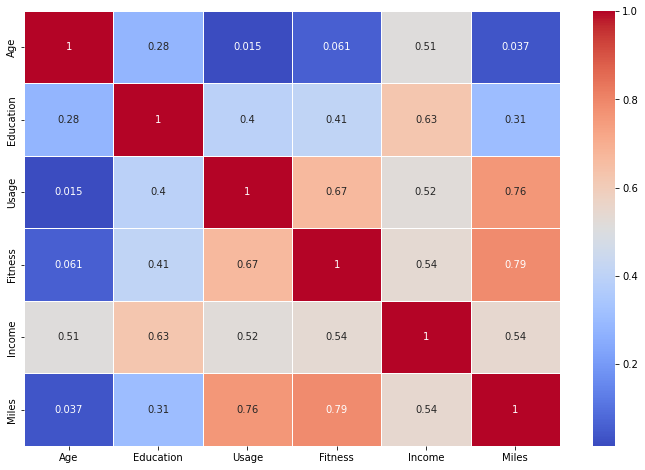

In [100]:
plt.figure(figsize = (12, 8))
sns.heatmap( df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm')
plt.show()

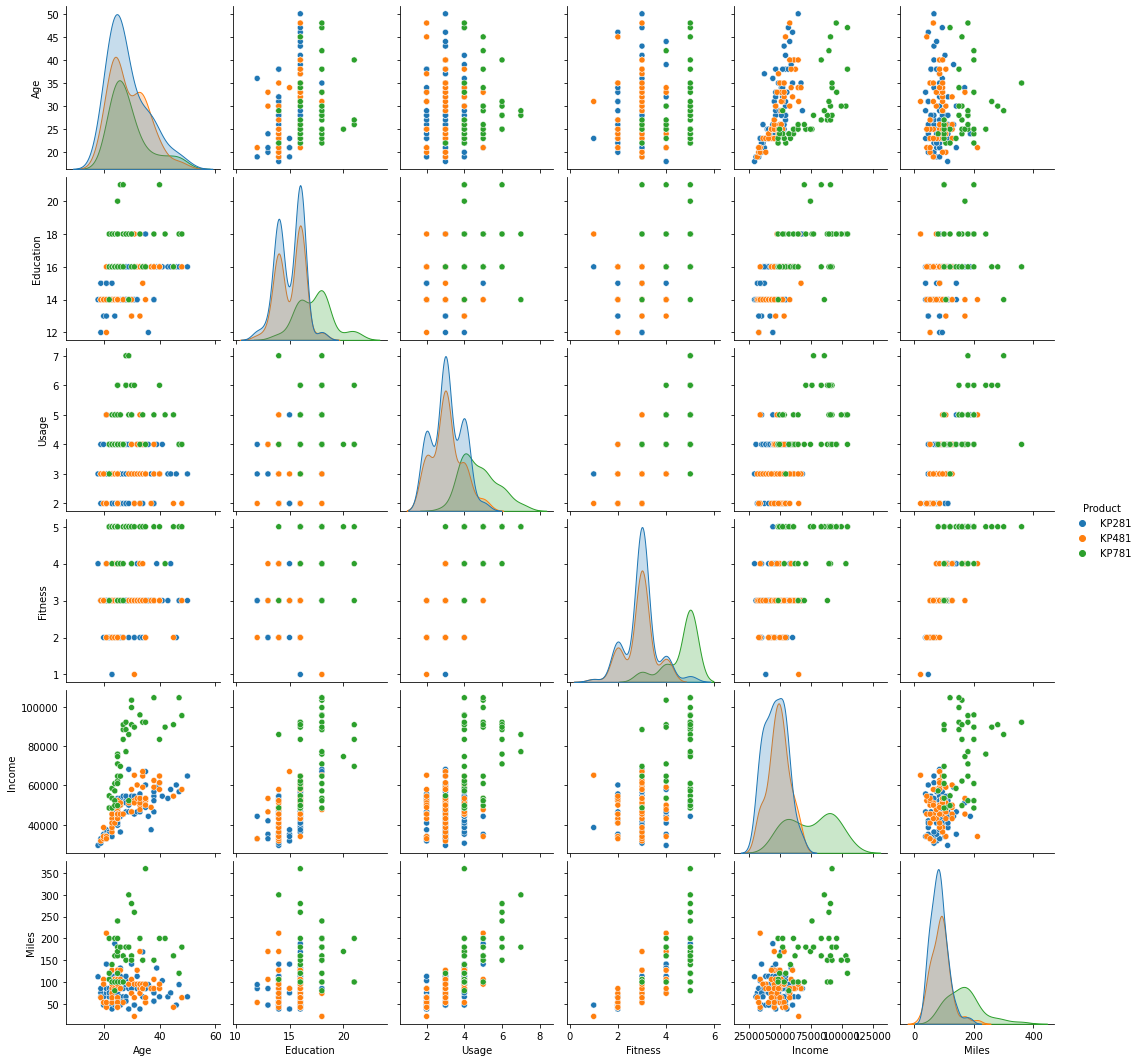

In [101]:
sns.pairplot(df, hue = 'Product')

# Missing Value & Outlier Detection

In [102]:
# No missing values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Their are no missing values
___

In [103]:
data = []
for Att in ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:
  for model in ['KP281', 'KP481', 'KP781']:
    obj = {}

    q1 = df.loc[df['Product'] == model, Att].quantile(.25)
    q3 = df.loc[df['Product'] == model, Att].quantile(.75)

    iqr = q3 - q1

    upper_w = q3 + 1.5*iqr
    lower_w = q1 - 1.5*iqr

    outliers = len(df.loc[(df['Product'] == model) & (df[Att] > upper_w)]) + len(df.loc[(df['Product'] == model) & (df[Att] < lower_w)])

    obj['Attributes'] = Att
    obj['Model'] = model
    obj['Upper_Whisker'] = upper_w
    obj['Inter Quartile Range'] = iqr
    obj['Lower_Whisker'] = lower_w
    obj['Outliers'] = outliers

    data.append(obj)

pd.DataFrame(data)

,Attributes,Model,Upper_Whisker,Inter Quartile Range,Lower_Whisker,Outliers
0,Age,KP281,48.000,10.00,8.000,1
1,Age,KP481,47.125,9.25,10.125,1
2,Age,KP781,38.500,5.50,16.500,5
3,Education,KP281,19.000,2.00,11.000,0
4,Education,KP481,19.000,2.00,11.000,0
5,Education,KP781,21.000,2.00,13.000,0
6,Usage,KP281,5.500,1.00,1.500,0
7,Usage,KP481,3.625,0.25,2.625,29
8,Usage,KP781,6.500,1.00,2.500,2
9,Fitness,KP281,3.000,0.00,3.000,26


**As their are very less outliers Its doesn't effect the data as such**

___

# Business Insights based on Non-Graphical and Visual Analysis

## Comments on the range of attributes

In [105]:
# For Non Categorical Values

data = []
for att in df.columns:
  if df[att].dtype == 'int64':
    obj = {}
    obj['Attributes'] = att
    obj['Min_Value'] = df[att].min()
    obj['Mean'] = df[att].mean()
    obj['Max_Value'] = df[att].max()

    data.append(obj)

pd.DataFrame(data)

,Attributes,Min_Value,Mean,Max_Value
0,Age,18,28.788889,50
1,Education,12,15.572222,21
2,Usage,2,3.455556,7
3,Fitness,1,3.311111,5
4,Income,29562,53719.577778,104581
5,Miles,21,103.194444,360


In [106]:
# For categorical Values

data = []
for att in df.columns:
  if df[att].dtype == 'object':
    obj = {}
    most_freq = df[att].value_counts().index[0], df[att].value_counts()[0]
    less_freq = df[att].value_counts().index[-1], df[att].value_counts()[-1]

    obj['Attributes'] = att
    obj['Most Frequent'] = most_freq
    obj['Less Frequent'] = less_freq

    data.append(obj)


pd.DataFrame(data)

,Attributes,Most Frequent,Less Frequent
0,Product,"(KP281, 80)","(KP781, 40)"
1,Gender,"(Male, 104)","(Female, 76)"
2,MaritalStatus,"(Partnered, 107)","(Single, 73)"


## Comments on the distribution of the variables and relationship between them AND Comments for each univariate and bivariate plot

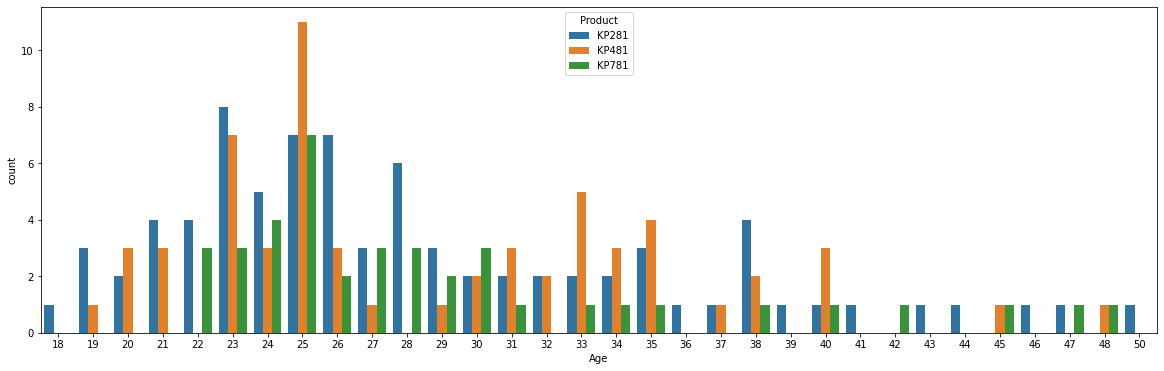

In [107]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'Age', data = df, hue = 'Product')
plt.show()

**Above is the Relationship between Product and Age**

1. The Product **KP281** is mostly bought by the people of age **23**
2. The Product **KP481** is mostly bought by the people of age **25**
3. The Product **KP781** is mostly bought by the people of age **25**


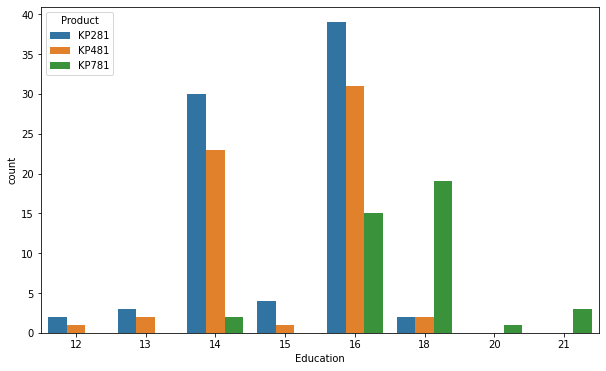

In [108]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Education', data = df, hue = 'Product')
plt.show()

**Above is the Relationship between Product and Education in years**

1. The Product **KP281** is mostly bought by the people of Education years of  **16**
2. The Product **KP481** is mostly bought by the people of Education years of  **16**
3. The Product **KP781** is mostly bought by the people of Education years of  **18**


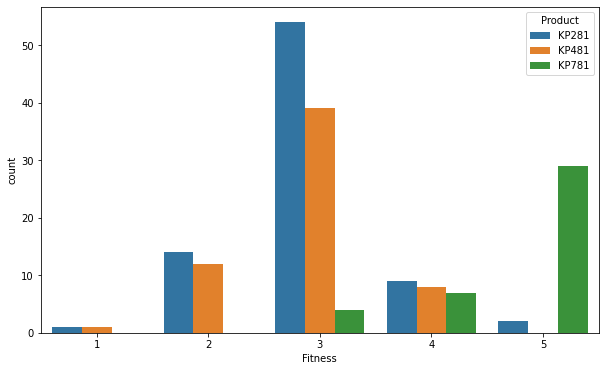

In [109]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Fitness', data = df, hue = 'Product')
plt.show()

**Above is the Relationship between Product and Fitness ratings for different Products**

1. Self-rated fitness rating for the Product **KP281** is **3**
2. Self-rated fitness rating for the Product **KP481** is **3**
3. Self-rated fitness rating for the Product **KP781** is **5**


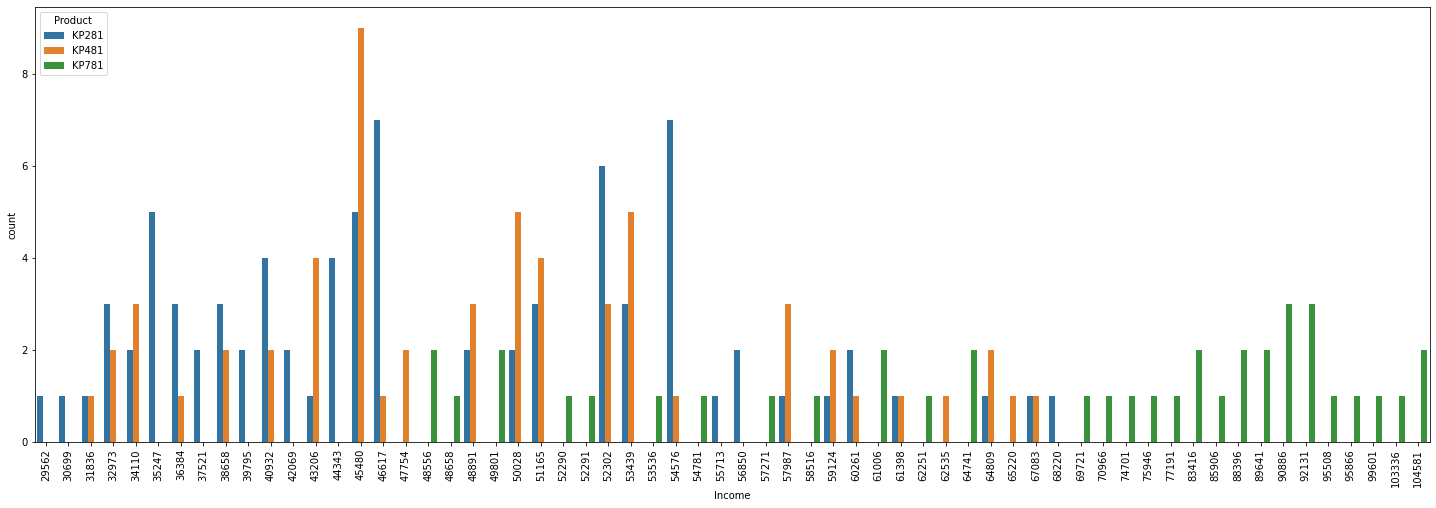

In [110]:
plt.figure(figsize = (25, 8))
sns.countplot(x = 'Income', data = df, hue = 'Product')
plt.xticks(rotation = 90)
plt.show()

**Above is the Relationship between Product and Income of the customer**

1. The Product **KP281** Mostly bought by the customers whose Income is **Between 45480 and 46617**
2. The Product **KP481** Mostly bought by the customers whose Income is **Between 45480 and 46617**
3. The Product **KP781** Mostly bought by the customers whose Income is **Between 90886 and 95508**


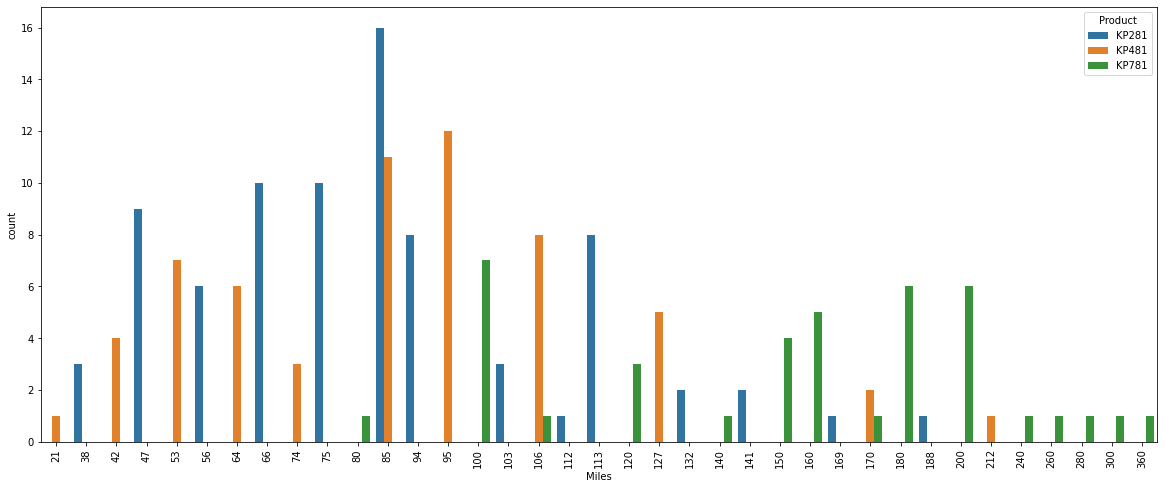

In [111]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Miles', data = df, hue = 'Product')
plt.xticks(rotation = 90)
plt.show()

**Above is the Relationship between Product and Average Number of miles the customer expected to walk each week**

1. The customers who bought the Product **KP281** mostly ran about **85 miles/week**
2. The customers who bought the Product **KP481** mostly ran about **95 miles/week**
3. The customers who bought the Product **KP781** mostly ran about **(180-200) miles/week**


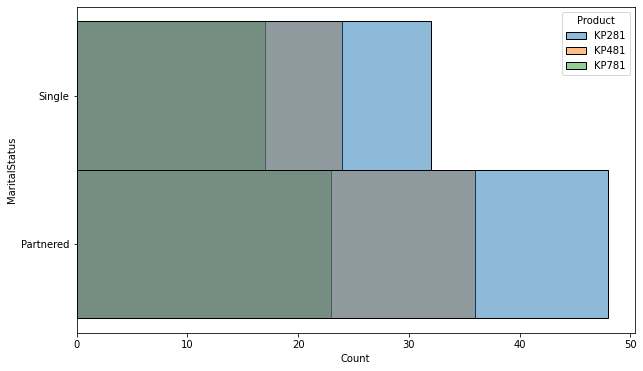

In [112]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, y = 'MaritalStatus', hue = 'Product')
# plt.xticks(rotation = 90)
plt.show()

**Above is the Relationship between Product and Marital Status**

1. The customers who bought the Product **KP281** mostly were **Partnered**
2. The customers who bought the Product **KP481** mostly were **Partnered**
3. The customers who bought the Product **KP781** mostly were **Partnered**


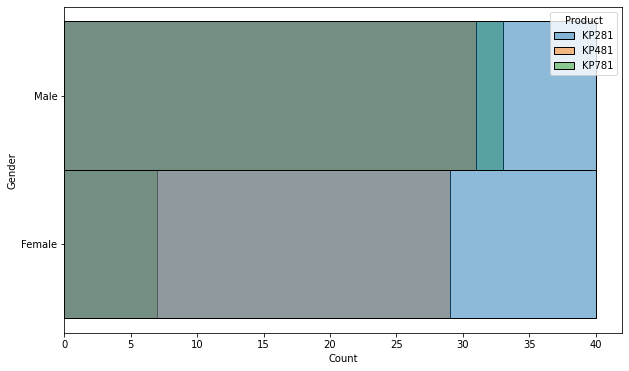

In [113]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, y = 'Gender', hue = 'Product')
# plt.xticks(rotation = 90)
plt.show()

**Above is the Relationship between Product and Gender**

1. The customers who bought the Product **KP281** mostly were **Male**
2. The customers who bought the Product **KP481** mostly were **Male**
3. The customers who bought the Product **KP781** mostly were **Male**


In [114]:
data = []
for att in df.columns:
  if att == 'Product':
    continue
  for model in df['Product'].unique():
    obj = {}

    obj['Attributes'] = att
    obj['Model'] = model
    obj['Observations'] = df.loc[df['Product'] == model, att].value_counts().index[0]

    data.append(obj)

pd.DataFrame(data)

,Attributes,Model,Observations
0,Age,KP281,23
1,Age,KP481,25
2,Age,KP781,25
3,Gender,KP281,Male
4,Gender,KP481,Male
5,Gender,KP781,Male
6,Education,KP281,16
7,Education,KP481,16
8,Education,KP781,18
9,MaritalStatus,KP281,Partnered


# Computing Marginal & Conditional Probabilities

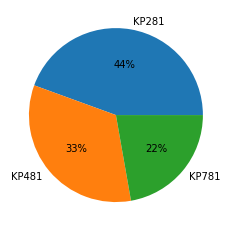

In [115]:
# PIE CHART for the percentage sales of Each Model

plt.pie(df['Product'].value_counts(), labels = df['Product'].value_counts().index, autopct='%.0f%%')
plt.show()

In [116]:
print('Probability of Male customer buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male')]) / len(df['Gender'] == 'Male')*100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Male')]) / len(df['Gender'] == 'Male')*100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Male')]) / len(df['Gender'] == 'Male')*100)
print()
print('-------------')

print('Probability of Female customer buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Female')]) / len(df['Gender'] == 'Female')*100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Female')]) / len(df['Gender'] == 'Female')*100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Female')]) / len(df['Gender'] == 'Female')*100)
print()
print('-------------')

print('Probability of customer with status Single buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Single')]) / len(df['MaritalStatus'] == 'Single')*100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Single')]) / len(df['MaritalStatus'] == 'Single')*100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Single')]) / len(df['MaritalStatus'] == 'Single')*100)
print()
print('-------------')

print('Probability of customer with status Partnered buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Partnered')]) / len(df['MaritalStatus'] == 'Partnered')*100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Partnered')]) / len(df['MaritalStatus'] == 'Partnered')*100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Partnered')]) / len(df['MaritalStatus'] == 'Partnered')*100)
print()
print('-------------')

print('Probability of customer with status Single and Male buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) * 100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) * 100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) * 100)
print()
print('-------------')


print('Probability of customer with status Single and Feale buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) * 100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) * 100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) * 100)
print()
print('-------------')

print('Probability of customer with status Partnered and Male buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Male')]) * 100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Male')]) * 100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Male')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Male')]) * 100)
print()
print('-------------')


print('Probability of customer with status Partnered and Feale buying treadmills')
print('KP781 ->', len(df.loc[(df['Product'] == 'KP781') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Female')]) * 100)
print('KP481 ->', len(df.loc[(df['Product'] == 'KP481') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Female')]) * 100)
print('KP281 ->', len(df.loc[(df['Product'] == 'KP281') & (df['MaritalStatus'] == 'Single') & (df['Gender'] == 'Female')]) / len(df.loc[(df['MaritalStatus'] == 'Partnered') & (df['Gender'] == 'Female')]) * 100)
print()
print('-------------')





Probability of Male customer buying treadmills
KP781 -> 18.333333333333332
KP481 -> 17.22222222222222
KP281 -> 22.22222222222222

-------------
Probability of Female customer buying treadmills
KP781 -> 3.888888888888889
KP481 -> 16.11111111111111
KP281 -> 22.22222222222222

-------------
Probability of customer with status Single buying treadmills
KP781 -> 9.444444444444445
KP481 -> 13.333333333333334
KP281 -> 17.77777777777778

-------------
Probability of customer with status Partnered buying treadmills
KP781 -> 12.777777777777777
KP481 -> 20.0
KP281 -> 26.666666666666668

-------------
Probability of customer with status Single and Male buying treadmills
KP781 -> 32.55813953488372
KP481 -> 23.25581395348837
KP281 -> 44.18604651162791

-------------
Probability of customer with status Single and Feale buying treadmills
KP781 -> 10.0
KP481 -> 46.666666666666664
KP281 -> 43.333333333333336

-------------
Probability of customer with status Partnered and Male buying treadmills
KP781 -> 

# Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

**For the Category of the Model KP281**


      1.   Customer with Status Single has high priority both (Male and Female)
      2.   Customer with Average Income 46,418 prefered to buy this Model
      3.   Customer with Average Education of 16 years tends to buy this model
      4.   Customer with Average age of 23 buys this models
      5.   Custoemr with Self Rated 3 buys this type of Product
      6.   Customer who has habit of running Averagely about 85 miles/week buy this model

**For the Category of the Model KP481**


      1.   Customer with Status Single and Female has high priority
      2.   Customer with Average Income 48,973 prefered to buy this Model
      3.   Customer with Average Education of 16 years tends to buy this model
      4.   Customer with Average age of 25 buys this models
      5.   Custoemr with Self Rated 3 buys this type of Product
      6.   Customer who has habit of running Averagely about 95 miles/week buy this model

**For the Category of the Model KP781**


      1.   Customer with Status Partnered and Male has high priority
      2.   Customer with Average Income 75,441 prefered to buy this Model
      3.   Customer with Average Education of 18 years tends to buy this model
      4.   Customer with Average age of 25 buys this models
      5.   Custoemr with Self Rated 5 buys this type of Product
      6.   Customer who has habit of running Averagely about 180-200 miles/week buy this model




**SIMPLE ACTIONABLE ITEMS**

1. If customer is Single and aged 23 yrs with 16 yrs of education earn about 47k on an average and need basic model to start with then push him/ her to go with KP281 model
2. If customer is Single and aged more than 25 with 16yrs of education earn about 49k on an average and need Intermediate model then push him/ her to go with KP481 model
3. If customer is Partnered and Male aged more than 25 with 18yrs of education earn about 76k on an average and need best model for better experience with then push him to go with KP781 model
4. If customer is Partnered and Female aged more than 25 with 18yrs of education earn about 76k on an average and need best model for better experience with then push her to go with either KP481 or KP781 model
5. Check even the Usage of customer If he/ she is beginner then suggest him/ her to go with KP281, If he/ she is Intermediate the suggest to go for KP481, If he/ she is Advanced then suggest to go for KP781
